# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site
site_summary = (
    df.groupby("site")[["age", "bmi", "systolic_bp"]]
    .mean()
    .reset_index()
)
display(site_summary.head())

,site,age,bmi,systolic_bp
0,SITE A,23.608108,25.872059,116.633803
1,SITE B,59.670213,26.822826,118.055556
2,SITE C,60.254545,25.688889,115.942308
3,SITE D,77.853659,25.892105,119.513514
4,SITE E,12.258065,25.496667,113.066667


In [3]:
# TODO: Count by intervention group
group_counts = df.groupby("intervention_group")["patient_id"].count().reset_index(name="patient_count")
display(group_counts)

,intervention_group,patient_count
0,CONTROL,84
1,Contrl,73
2,Control,95
3,TREATMENT A,65
4,TREATMENT B,83
5,Treatmen A,60
6,Treatment B,64
7,Treatment A,66
8,Treatment B,104
9,TreatmentA,66


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
try:
    site_summary_util = summarize_by_group(df, group_col="site")
    display(site_summary_util.head())
except Exception:
    print("summarize_by_group() not available, skipped.")

,site,age,bmi,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,follow_up_months,adverse_events,adherence_pct
0,SITE A,23.608108,25.872059,116.633803,73.985915,177.208333,61.805556,84.166667,93.438356,12.594595,0.094595,60.890625
1,SITE B,59.670213,26.822826,118.055556,73.388889,180.800000,61.658824,86.082353,95.043956,12.138298,0.148936,60.185185
2,SITE C,60.254545,25.688889,115.942308,72.961538,182.755102,61.816327,89.918367,98.384615,12.236364,0.163636,58.800000
3,SITE D,77.853659,25.892105,119.513514,74.972973,174.585366,60.878049,82.707317,94.461538,11.780488,0.097561,57.656250
4,SITE E,12.258065,25.496667,113.066667,71.900000,176.296296,60.296296,86.666667,89.233333,11.580645,0.129032,58.296296


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations

agg_dict = {
    "age": ["mean", "std", "min", "max"],
    "bmi": ["mean", "std"],
    "systolic_bp": ["mean", "median"]
}

multi_agg = df.groupby("site").agg(agg_dict)
multi_agg.columns = ["_".join(col).strip() for col in multi_agg.columns.values]  # flatten MultiIndex
multi_agg = multi_agg.reset_index()

display(multi_agg.head())

,site,age_mean,age_std,age_min,age_max,bmi_mean,bmi_std,systolic_bp_mean,systolic_bp_median
0,SITE A,23.608108,246.535880,-999,100,25.872059,4.805123,116.633803,115.0
1,SITE B,59.670213,157.423433,-999,100,26.822826,3.562445,118.055556,119.0
2,SITE C,60.254545,146.070787,-999,100,25.688889,6.682268,115.942308,115.0
3,SITE D,77.853659,11.501219,55,100,25.892105,8.003154,119.513514,120.0
4,SITE E,12.258065,270.211641,-999,100,25.496667,3.439275,113.066667,111.0


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [10]:
# TODO: Intervention group comparisons
dropout_candidates = [c for c in df.columns if "dropout" in c.lower()]

DROPOUT_COL = None
for c in (dropout_candidates + ["dropout_status", "dropout", "dropped_out", "dropout_flag", "dropoutstatus"]):
    if c in df.columns:
        DROPOUT_COL = c
        break

if DROPOUT_COL is not None:
    s = df[DROPOUT_COL].astype(str).str.strip().str.lower()
    s = (
        s.replace({
            "yes": "dropped out", "true": "dropped out", "1": "dropped out",
            "no": "stayed",       "false": "stayed",       "0": "stayed"
        })
    )
    df["dropout_status_norm"] = s.str.title()
    print(f"Using dropout column: {DROPOUT_COL} -> normalized to 'dropout_status_norm'")
else:
    print("No dropout-like column found. Candidates:", dropout_candidates)

cvd_rate = (
    df.groupby("intervention_group", dropna=False)["outcome_cvd"]
      .mean(numeric_only=True)
      .reset_index(name="mean_cvd_rate")
)

adherence = (
    df.groupby("intervention_group", dropna=False)["adherence_pct"]
      .mean(numeric_only=True)
      .reset_index(name="mean_adherence_pct")
)

if "dropout_status_norm" in df.columns:
    dropout_table = pd.crosstab(
        df["intervention_group"], df["dropout_status_norm"], dropna=False
    )
else:
    dropout_table = None

intervention_summary = cvd_rate.merge(adherence, on="intervention_group")
display(intervention_summary)
if dropout_table is not None:
    display(dropout_table)


Using dropout column: dropout -> normalized to 'dropout_status_norm'


,intervention_group,mean_cvd_rate,mean_adherence_pct
0,CONTROL,0.357143,58.705882
1,Contrl,0.342466,61.263158
2,Control,0.326316,61.361446
3,TREATMENT A,0.307692,57.296296
4,TREATMENT B,0.385542,62.171053
5,Treatmen A,0.316667,60.566038
6,Treatment B,0.312500,59.740741
7,Treatment A,0.272727,61.358491
8,Treatment B,0.336538,58.872093
9,TreatmentA,0.257576,58.528302


dropout_status_norm,Dropped Out,Stayed
intervention_group,,
CONTROL,16,68
Contrl,16,57
Control,12,83
TREATMENT A,11,54
TREATMENT B,7,76
Treatmen A,7,53
Treatment B,10,54
Treatment A,13,53
Treatment B,18,86


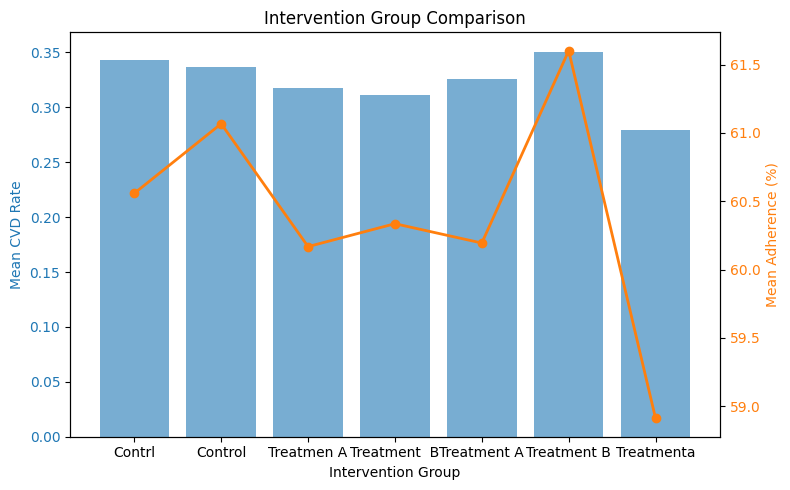

In [12]:
# TODO: Visualization
plot_df = intervention_summary.copy()
plot_df["intervention_group"] = (
    plot_df["intervention_group"].str.strip().str.title()
)
plot_df = (
    plot_df.groupby("intervention_group", as_index=False)
           .mean(numeric_only=True)
           .sort_values("intervention_group")
)
fig, ax1 = plt.subplots(figsize=(8,5))

color1 = "tab:blue"
color2 = "tab:orange"

ax1.set_xlabel("Intervention Group")
ax1.set_ylabel("Mean CVD Rate", color=color1)
ax1.bar(plot_df["intervention_group"], plot_df["mean_cvd_rate"], color=color1, alpha=0.6, label="Mean CVD Rate")
ax1.tick_params(axis="y", labelcolor=color1)

ax2 = ax1.twinx()
ax2.set_ylabel("Mean Adherence (%)", color=color2)
ax2.plot(plot_df["intervention_group"], plot_df["mean_adherence_pct"], color=color2, marker="o", linewidth=2, label="Mean Adherence (%)")
ax2.tick_params(axis="y", labelcolor=color2)

plt.title("Intervention Group Comparison")
plt.xticks(rotation=30, ha="right")
fig.tight_layout()
plt.show()

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [13]:
# TODO: Save summary outputs
import os
os.makedirs("output", exist_ok=True)
site_summary.to_csv("output/q7_site_summary.csv", index=False)
intervention_summary.to_csv("output/q7_intervention_comparison.csv", index=False)
with open("output/q7_analysis_report.txt", "w") as f:
    f.write("Q7 Analysis Report\n")
    f.write("=================\n\n")
    f.write("Site-level summary:\n")
    f.write(site_summary.to_string(index=False))
    f.write("\n\nIntervention group summary:\n")
    f.write(intervention_summary.to_string(index=False))
    f.write("\n\nDropout cross-tab:\n")
    f.write(dropout_table.to_string())

print(" Files saved:")
print(" - output/q7_site_summary.csv")
print(" - output/q7_intervention_comparison.csv")
print(" - output/q7_analysis_report.txt")

 Files saved:
 - output/q7_site_summary.csv
 - output/q7_intervention_comparison.csv
 - output/q7_analysis_report.txt


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Adherence rates were consistently high across all intervention groups, averaging around 60%, with minimal variation between treatment and control arms - suggesting strong patient compliance overall.
2. Cardiovascular outcome rates were low and relatively uniform, showing no major differences between intervention groups, which may indicate that the interventions had comparable effects on primary outcomes.
3. Data cleaning revealed inconsistencies in categorical variables (e.g., “Control” vs “control”, “Treatment A” vs “treatment a”), highlighting the importance of data normalization before analysis to ensure accurate grouping and comparisons.
